In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data import and preparation

In [278]:
raw_data = pd.read_csv('./world-data-2023.csv')

In [279]:
raw_data.loc[:,'Country':'Co2-Emissions']

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672"
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536"
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006"
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693"
...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175"
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668"
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609"
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141"


In [280]:
raw_data.loc[:,'Co2-Emissions':'Maternal mortality ratio']

,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio
0,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0
1,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0
2,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0
3,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN
4,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,"164,175","2,740.27",254.90%,VED,2.27,52.70%,$0.00,"$482,359,318,768",97.20%,79.30%,21.4,Caracas,72.1,125.0
191,"192,668",163.52,2.80%,VND,2.05,48.10%,$0.80,"$261,921,244,843",110.60%,28.50%,16.5,Ho Chi Minh City,75.3,43.0
192,"10,609",157.58,8.10%,YER,3.79,1.00%,$0.92,"$26,914,402,224",93.60%,10.20%,42.9,Sanaa,66.1,164.0
193,"5,141",212.31,9.20%,ZMW,4.63,65.20%,$1.40,"$23,064,722,446",98.70%,4.10%,40.4,Lusaka,63.5,213.0


In [281]:
raw_data.loc[:,'Maternal mortality ratio':]

,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,125.0,$0.01,Spanish,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,43.0,$0.73,Vietnamese,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,164.0,NaN,Arabic,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,213.0,$0.24,English,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [282]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [283]:
raw_data = raw_data.drop(['Abbreviation','Calling Code','Capital/Major City','Currency-Code','Largest city','Official language',
                        'Latitude','Longitude'],axis=1)

In [284]:
cols_to_convert = raw_data.select_dtypes(include=['object']).columns.difference(['Country'])

In [285]:
raw_data[cols_to_convert] = raw_data[cols_to_convert].apply(lambda x: x.str.replace('[%,$]','',regex=True).astype(float))

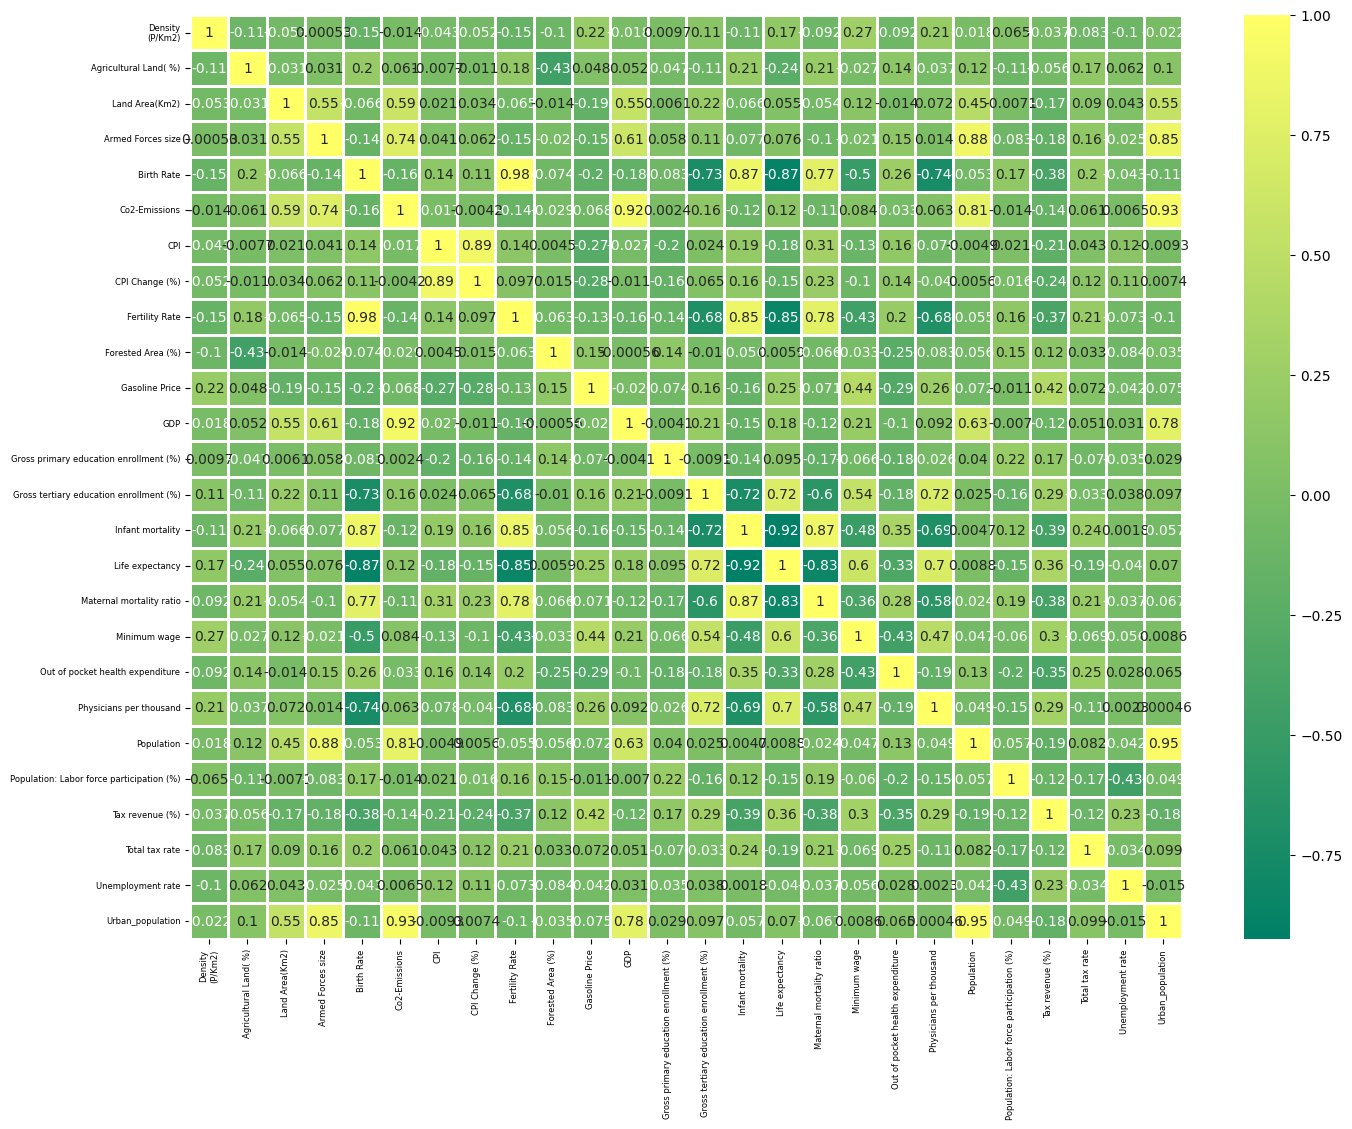

In [286]:
plt.figure(figsize=(16,12))
sns.heatmap(raw_data.drop(['Country'],axis=1).corr(),cmap='summer',linecolor='white',linewidths=1,annot=True)
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.show()

In [287]:
dataset = raw_data.drop(['Agricultural Land( %)','Land Area(Km2)','Co2-Emissions','CPI Change (%)','Fertility Rate',
                         'Forested Area (%)','Gasoline Price','Minimum wage','Gross tertiary education enrollment (%)',
                         'Maternal mortality ratio','Out of pocket health expenditure','Tax revenue (%)','Population','Urban_population'],axis=1)

In [288]:
dataset = dataset.rename(columns={'Density\n(P/Km2)': 'Density(P/Km2)','Agricultural Land( %)':'Agricultural Land(%)',
                                  'Population: Labor force participation (%)':'Labor force participation(%)'})

In [289]:
dataset.dropna(inplace=True)

In [290]:
dataset.head()

,Country,Density(P/Km2),Armed Forces size,Birth Rate,CPI,GDP,Gross primary education enrollment (%),Infant mortality,Life expectancy,Physicians per thousand,Labor force participation(%),Total tax rate,Unemployment rate
0,Afghanistan,60.0,323000.0,32.49,149.90,1.910135e+10,104.0,47.9,64.5,0.28,48.9,71.4,11.12
1,Albania,105.0,9000.0,11.78,119.05,1.527808e+10,107.0,7.8,78.5,1.20,55.7,36.6,12.33
2,Algeria,18.0,317000.0,24.28,151.36,1.699882e+11,109.9,20.1,76.7,1.72,41.2,66.1,11.70
4,Angola,26.0,117000.0,40.73,261.73,9.463542e+10,113.5,51.6,60.8,0.21,77.5,49.1,6.89
6,Argentina,17.0,105000.0,17.02,232.75,4.496634e+11,109.7,8.8,76.5,3.96,61.3,106.3,9.79


In [291]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 160 non-null    object 
 1   Density(P/Km2)                          160 non-null    float64
 2   Armed Forces size                       160 non-null    float64
 3   Birth Rate                              160 non-null    float64
 4   CPI                                     160 non-null    float64
 5   GDP                                     160 non-null    float64
 6   Gross primary education enrollment (%)  160 non-null    float64
 7   Infant mortality                        160 non-null    float64
 8   Life expectancy                         160 non-null    float64
 9   Physicians per thousand                 160 non-null    float64
 10  Labor force participation(%)            160 non-null    float64
 11

In [292]:
dataset.describe()

,Density(P/Km2),Armed Forces size,Birth Rate,CPI,GDP,Gross primary education enrollment (%),Infant mortality,Life expectancy,Physicians per thousand,Labor force participation(%),Total tax rate,Unemployment rate
count,160.000000,1.600000e+02,160.000000,160.000000,1.600000e+02,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000
mean,212.762500,1.563000e+05,20.365562,171.256812,5.733593e+11,103.108125,21.358125,72.40875,1.821063,62.725625,39.821875,6.797938
std,707.705696,3.785845e+05,9.989200,232.114955,2.375542e+12,11.829996,19.782584,7.65809,1.578942,10.274455,15.347225,4.918317
min,2.000000,0.000000e+00,6.400000,99.030000,4.290166e+08,61.800000,1.400000,52.80000,0.010000,38.000000,8.000000,0.090000
25%,31.750000,1.075000e+04,11.225000,115.142500,1.433814e+10,98.950000,5.975000,66.67500,0.340000,56.425000,30.600000,3.395000
50%,83.000000,2.950000e+04,18.125000,129.090000,5.355460e+10,102.350000,13.750000,74.10000,1.570000,62.150000,37.550000,5.375000
75%,152.250000,1.365000e+05,28.832500,162.537500,3.034813e+11,107.525000,33.825000,77.87500,2.982500,68.950000,47.500000,9.207500
max,8358.000000,3.031000e+06,46.080000,2740.270000,2.142770e+13,142.500000,84.500000,84.20000,7.120000,86.800000,106.300000,28.180000


# exploratory data analysis

In [293]:
# sns.pairplot(dataset)

In [294]:
dataset.drop(['Country',],axis=1).corr()

,Density(P/Km2),Armed Forces size,Birth Rate,CPI,GDP,Gross primary education enrollment (%),Infant mortality,Life expectancy,Physicians per thousand,Labor force participation(%),Total tax rate,Unemployment rate
Density(P/Km2),1.000000,-0.001345,-0.150781,-0.044617,-0.009631,-0.000836,-0.126198,0.173086,0.042005,0.075132,-0.154226,-0.114883
Armed Forces size,-0.001345,1.000000,-0.144134,0.062207,0.632299,0.037946,-0.076016,0.082285,-0.004192,-0.136101,0.158017,-0.003975
Birth Rate,-0.150781,-0.144134,1.000000,0.089296,-0.200245,0.053573,0.876464,-0.881060,-0.763491,0.187142,0.212422,-0.020339
CPI,-0.044617,0.062207,0.089296,1.000000,-0.029153,-0.055368,0.097473,-0.106954,-0.090192,-0.077920,0.196402,0.113326
GDP,-0.009631,0.632299,-0.200245,-0.029153,1.000000,-0.017783,-0.165022,0.182254,0.107927,-0.007185,0.089542,0.038622
Gross primary education enrollment (%),-0.000836,0.037946,0.053573,-0.055368,-0.017783,1.000000,0.005342,-0.031870,-0.110495,0.253734,-0.012215,0.001884
Infant mortality,-0.126198,-0.076016,0.876464,0.097473,-0.165022,0.005342,1.000000,-0.935249,-0.731764,0.158137,0.237243,-0.010792
Life expectancy,0.173086,0.082285,-0.881060,-0.106954,0.182254,-0.031870,-0.935249,1.000000,0.732420,-0.171871,-0.159051,-0.042230
Physicians per thousand,0.042005,-0.004192,-0.763491,-0.090192,0.107927,-0.110495,-0.731764,0.732420,1.000000,-0.171388,-0.095829,0.050809
Labor force participation(%),0.075132,-0.136101,0.187142,-0.077920,-0.007185,0.253734,0.158137,-0.171871,-0.171388,1.000000,-0.153379,-0.469287


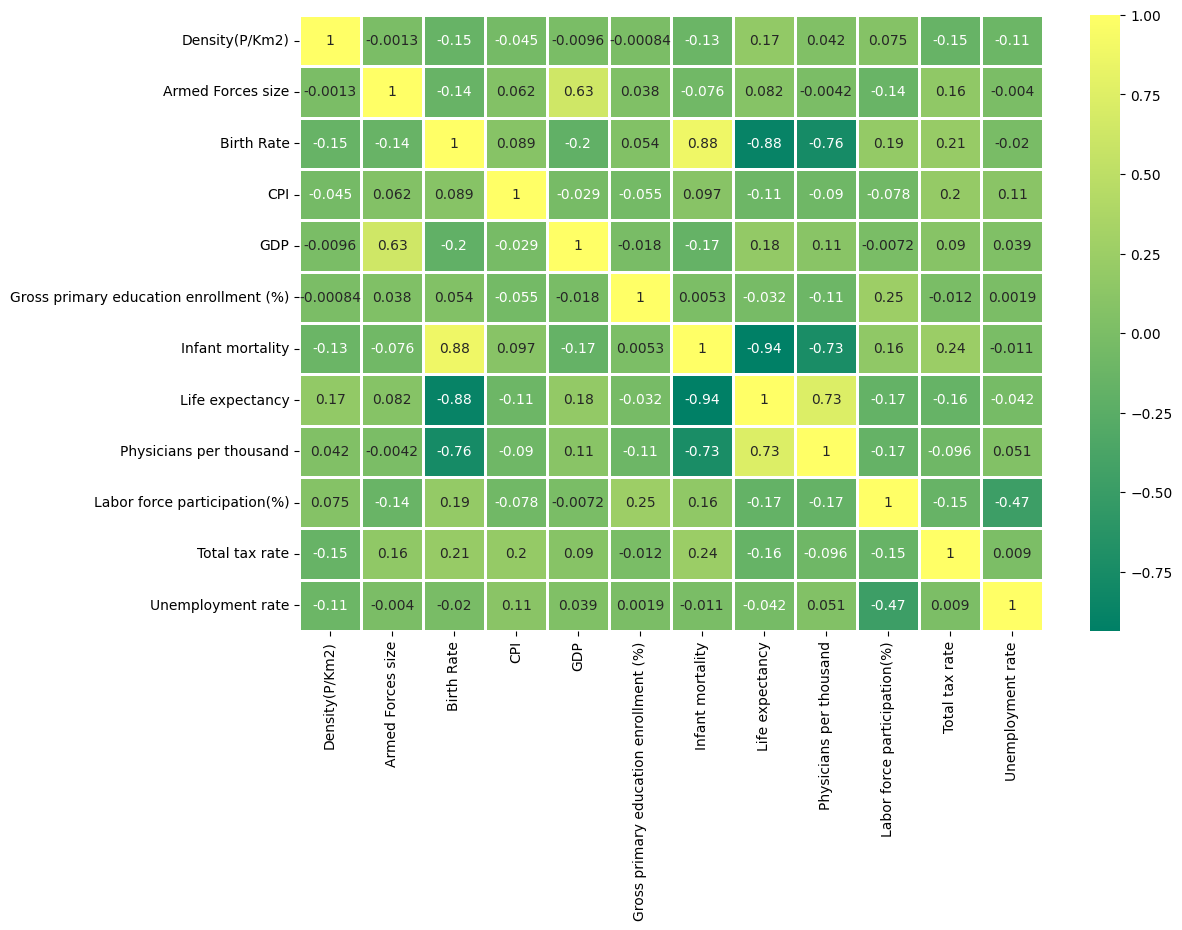

In [295]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.drop(['Country',],axis=1).corr(),cmap='summer',linecolor='white',linewidths=1,annot=True)
plt.show()